<a href="https://www.kaggle.com/code/mdbadrulislam/image-similarity?scriptVersionId=124506944" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Image Similarity

There's two ways to find if an image is similar to another image. First is to look at **Mean Square Error (MSE)** and the second is **Structural Similarity Index (SSIM)**.
 
**Mean Square Error** is the averaged value of the square of the pixel-by-pixel difference between the original image and stego-image. It gives us a measure of the error produced in the cover image due to the data embedding process.

**SSIM** actually measures the perceptual difference between two similar images. It cannot judge which of the two is better: that must be inferred from knowing which is the “original” and which has been subjected to additional processing such as data compression.

The **SSIM index** is actually used for measuring the similarity between two images. The **SSIM** predicts image quality based on an initial uncompressed or distortion-free image as reference. It tells us how far away an image is from its original reference image more aligned with the human perceptual system. SSIM is designed to improve on traditional methods such as **peak signal-to- noise ratio (PSNR)** and **mean squared error**.

**MSE** calculates the mean square error between each pixels for the two images we are comparing. Whereas **SSIM** will do the opposite and look for similarities within pixels; i.e. if the pixels in the two images line up and or have similar pixel density values. The only issues is that MSE tends to have arbitrarily high numbers so it is harder to standardize it. While generally the higher the MSE the least similar they are, if the mse between picture sets differ appears randomly. **SSIM** on the other hand puts everything in a scale of **-1 to 1**. A score of 1 meant they are very similar and a score of -1 meant they are very different

The **SSIM** is a very important concept in digital signal processing and comes in handy in applications of deep learning as well.

Both equations are given below

![RMS](https://miro.medium.com/v2/resize:fit:640/format:webp/1*CsTajNNFTr-VoqVRLSJ4eA.png) ![SSIM](https://miro.medium.com/v2/resize:fit:640/format:webp/1*0J1LcpnTXtbfF0r7WDviEA.png) 

In [1]:
# Loading Libraries
from skimage.metrics import structural_similarity as ssim 
import numpy as np
import matplotlib.pyplot as plt
import cv2         # For Image Processing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Function for MSE
def mean_squared_error(image1, image2):
    error = np.sum((image1.astype('float') - image2.astype('float'))**2)
    error = error/float(image1.shape[0] * image2.shape[1])
    return error

In [3]:
# Function for image compare
def image_comparison(image1, image2):
    # input image must have the same dimension for comparison
    image2 = cv2.resize(image2,(image1.shape[1::-1]),interpolation=cv2.INTER_AREA)
    m = mean_squared_error(image1, image2)
    s = ssim(image1, image2, multichannel=True)
    print("Mean Squared Error is {}\nStructural Similarity Measure index is: {}".format(m,s))


OpenCV is not the best when it comes to resizing and reconfiguring images. For that Google’s TensorFlow is the best. TensorFlow works best with batch pictures.

In [4]:
# load images
image1 = cv2.imread("../input/catimage/Cat1.jpeg") 
image2 = cv2.imread("../input/catimage/Cat4.jpeg")

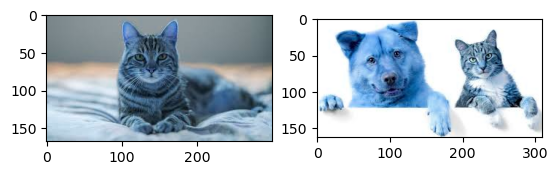

In [5]:
# display images
def compareImage(originalImage,transformedImage):
    plt.subplot(1, 2, 1)
    plt.imshow(originalImage)
    plt.subplot(1, 2, 2)
    plt.imshow(transformedImage)
    plt.show()
    
compareImage(image1,image2)

In [6]:
# Color Conversion 
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

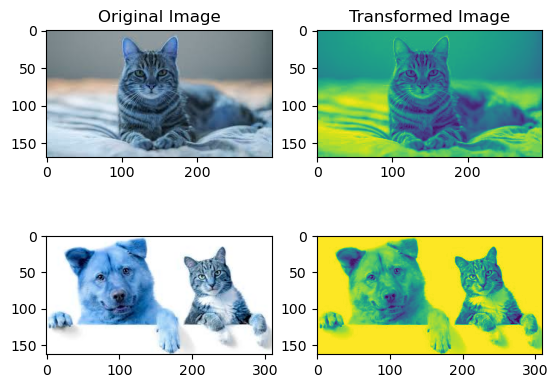

In [7]:
# compare images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.imshow(image1_gray)
plt.title("Transformed Image")
plt.subplot(2, 2, 3)
plt.imshow(image2)
plt.subplot(2, 2, 4)
plt.imshow(image2_gray)
plt.show()

In [8]:
# compare original RGB image similarity
image_comparison(image1,image2)

Mean Squared Error is 30451.449484126984
Structural Similarity Measure index is: 0.271241133912564


In [9]:
# Compare Gray image similarity
image_comparison(image1_gray,image2_gray)

Mean Squared Error is 9312.648392857143
Structural Similarity Measure index is: 0.3442502403032001


From this value, we can say that the value is improved for gray images

In [10]:
# Compare image similarity index for same image
image_comparison(image1,image1)

Mean Squared Error is 0.0
Structural Similarity Measure index is: 1.0


Here for same images, Structural Similarity Measure index is 1 .

### Image Augmentation

In [11]:
# Test image shape
image2.shape

(163, 310, 3)

In [12]:
# Shape inversion
image2.shape[1::-1]

(310, 163)

In [13]:
# Calculating image center
imageCenter = tuple(np.array(image2_gray.shape[1::-1])/2)
imageCenter

(155.0, 81.5)

In [14]:
# Rotation matrix
imageRotate = cv2.getRotationMatrix2D(imageCenter, angle=45, scale=1)
imageRotate

array([[  0.70710678,   0.70710678, -12.23075375],
       [ -0.70710678,   0.70710678, 133.47234842]])

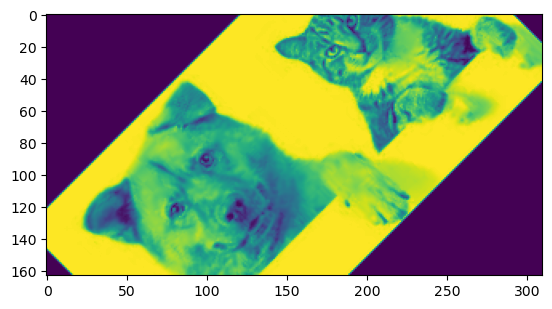

In [15]:
# applying rotation matrix to image
imageRotated = cv2.warpAffine(image2_gray,imageRotate,(image2.shape[1::-1]), flags=cv2.INTER_LINEAR)

plt.imshow(imageRotated)

In [16]:
# Store images as output
cv2.imwrite("../working/AugmentedImage.jpeg",imageRotated)

True

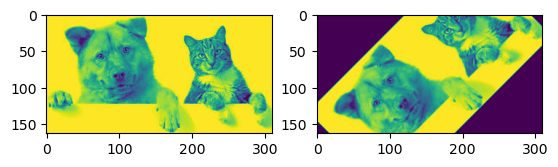

In [17]:
# display two images
compareImage(image2_gray,imageRotated)

In [18]:
# Compare two images similarity
image_comparison(image2_gray,imageRotated)

Mean Squared Error is 19804.706886997825
Structural Similarity Measure index is: 0.24795475745064113
